In [63]:
import pickle
import numpy as np
from datetime import datetime as dt,timedelta
import sys
sys.path.append('../') # This allows import of lib that is one level up
# from lib.tools import *
import lib
import xarray as xr


In [16]:
def listify(x):
    if isinstance(x,(tuple,list)):
        return [i for i in x]
    else:
        return [x]

In [18]:
limkey=1
EOF_FILE_PREFIX=f'/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/v2p0_hindcast_fold_10/data_clim/tmp/EOF_JRA_58-10_sliding_climo_'
fin = f'/Projects/jalbers_process/CPC_LIM/yuan_ming/CPC/Images_v2p0_hindcast_fold_10_dev_output_C0_Ctau_dev_output_C0_Ctau/model/{limkey}.p'

In [3]:
data = pickle.load(open(fin, "rb" ) )


ERROR 1: PROJ: proj_create_from_database: Open of /home/ycheng/.conda/envs/lim_test/share/proj failed


In [30]:
C0=data.C0

In [34]:
C0

matrix([[ 2.56892920e+02, -2.73529827e+00, -2.46901205e+00, ...,
         -3.56363049e+00,  2.43814509e+01, -1.22121845e+01],
        [-2.73529827e+00,  1.33501885e+02, -1.10583597e-01, ...,
          1.55832567e+01,  2.60407326e+01,  5.47414508e+00],
        [-2.46901205e+00, -1.10583597e-01,  1.05308750e+02, ...,
         -1.23643770e+01,  1.17561982e+01,  1.66118315e+00],
        ...,
        [-3.56363049e+00,  1.55832567e+01, -1.23643770e+01, ...,
          5.64180182e+01,  3.02041122e-01,  1.35042687e-01],
        [ 2.43814509e+01,  2.60407326e+01,  1.17561982e+01, ...,
          3.02041122e-01,  5.08748153e+01,  4.26008695e-01],
        [-1.22121845e+01,  5.47414508e+00,  1.66118315e+00, ...,
          1.35042687e-01,  4.26008695e-01,  3.73181910e+01]])

In [9]:
23+14+20+7+5+8+8+8

93

In [13]:
eof_trunc = {
            mn:{'colIrr':23,'H500':14,'SLP':20,'T2m':7,'SOIL':5,'SF750':8,'SF100':8,'SST':8} for mn in range(1,13)
            }
eof_lim=eof_trunc[m]
eof_lim

{'colIrr': 23,
 'H500': 14,
 'SLP': 20,
 'T2m': 7,
 'SOIL': 5,
 'SF750': 8,
 'SF100': 8,
 'SST': 8}

In [22]:
eofobjs ={}
for key in eof_lim.keys():
    if eof_lim[key]>0:
        eofobjs[key] = pickle.load( open( EOF_FILE_PREFIX+'+'.join(listify(key))+f'_{limkey}.p', "rb" ) )

varobjs = [v for name in eofobjs.keys() for v in eofobjs[name].varobjs]


In [49]:
F = np.sqrt(np.diag(C0))
F.shape



(93,)

In [50]:
for eofname,plen in eof_lim.items():
    print(eofname,plen)

colIrr 23
H500 14
SLP 20
T2m 7
SOIL 5
SF750 8
SF100 8
SST 8


In [53]:
Fmap = {}

if F is not None:
    F = np.asarray(F)
    #Reshape to (lead_times,pcs)
    Pshape = F.shape
    if len(Pshape)==1:
        F = F[np.newaxis,:]
        Pshape = F.shape
    else:
        F = F.reshape((np.product(Pshape[:-1]),Pshape[-1]))# the -1 dim is the total number of pcs (87)
    i0 = 0
    for eofname,plen in eof_lim.items():
        print(eofname,plen)
        # looping through all the variable of pcs, one variable at a time
        recon = eofobjs[eofname].reconstruct(F[:,i0:i0+plen])
        # print(recon)
        # input F(lead_times,num_eofs), num_eofs is read from self.eofobjs
        # recon(lead_times , # of grid pts of EOF patterns)
        i0 += plen
        for vname,v in recon.items(): # one item only (because one variable at a time from the parent loop)
            # if regrid:
            #     varobj = self.use_vars[vname]['data']
            #     v = np.array(list(map(varobj.regrid,v)))
            #     Fmap[vname] = v.reshape(Pshape[:-1]+v.shape[-2:]).squeeze()
                
            # else: # use this for converting F and E to grids in run_forecast_blend
            Fmap[vname] = v.reshape((*Pshape[:-1],v.shape[-1])).squeeze()
            print(Fmap[vname].shape)
                # Fmap[vname] dim = (lead_times,# of grid pts of EOF patterns)


colIrr 23
(2700,)
H500 14
(6480,)
SLP 20
(6480,)
T2m 7
(696,)
SOIL 5
(683,)
SF750 8
(6480,)
SF100 8
(5580,)
SST 8
(2093,)


In [46]:
Fmap['T2m'].shape

(696,)

In [47]:
VAR_FILE_PREFIX='/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/v2p0_hindcast_fold_10/data_clim/tmp/fullyr_JRA_58-10_sliding_climo_'
var_names= {'SF100':{},'SF750':{},'T2m':{},'SLP':{},'H500':{},'colIrr':{},'SST':{},'SOIL':{}}
use_vars={}
for name in var_names.keys():
    print("reading ",f"{VAR_FILE_PREFIX}{name}.p")
    use_vars[name] = pickle.load( open( f'{VAR_FILE_PREFIX}{name}.p', "rb" ) )
# data = pickle.load(open(f'/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/v2p0_hindcast_fold_10/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_{name}.p', "rb" ) )


reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/v2p0_hindcast_fold_10/data_clim/tmp/fullyr_JRA_58-10_sliding_climo_SF100.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/v2p0_hindcast_fold_10/data_clim/tmp/fullyr_JRA_58-10_sliding_climo_SF750.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/v2p0_hindcast_fold_10/data_clim/tmp/fullyr_JRA_58-10_sliding_climo_T2m.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/v2p0_hindcast_fold_10/data_clim/tmp/fullyr_JRA_58-10_sliding_climo_SLP.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/v2p0_hindcast_fold_10/data_clim/tmp/fullyr_JRA_58-10_sliding_climo_H500.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/v2p0_hindcast_fold_10/data_clim/tmp/fullyr_JRA_58-10_sliding_climo_colIrr.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/v2p0_hindcast_fold_10/data_clim/tmp/fullyr_JRA_58-10_sliding_climo_SST.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/v2p0_hindcast_fol

In [60]:
maps = {}
for name in var_names.keys():
    varobj = use_vars[name]['data']
    maps[name] = varobj.regrid(Fmap[name])
    lon = varobj.longrid[0,:]
    lat = varobj.latgrid[:,0]


In [64]:
ds = xr.Dataset()

# Loop through the dictionary to add variables to the dataset
for var_name, var_data in maps.items():
    ds[var_name] = (('lat', 'lon'), var_data)

# Add latitude and longitude coordinates to the dataset
ds['lat'] = lat
ds['lon'] = lon

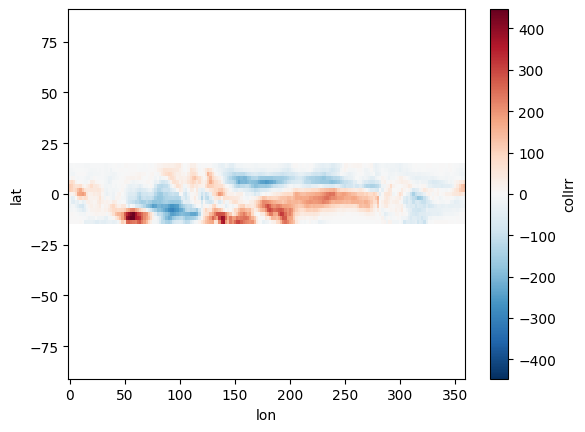

In [67]:
ds['colIrr'].plot()